In [441]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import math

In [442]:
def interpolating_function(x,y):
    N = len(x)

    def g(x_new):
        for i in range(N-1):
            if x_new >= x[i] and x_new <= x[i+1]:
                k = i
                a = (y[k+1] - y[k]) / (x[k+1] - x[k])
                b = y[k]
                y_new = a * (x_new - x[k]) + b
                return y_new

    return g

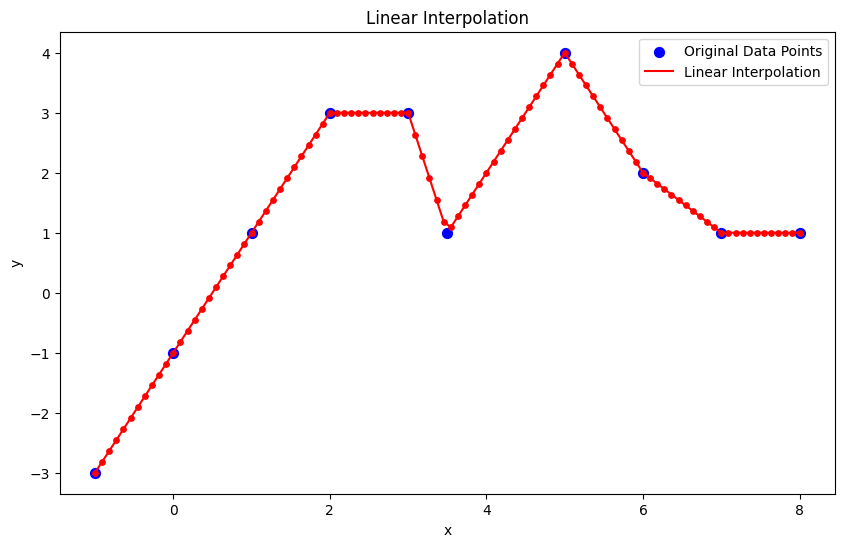

In [443]:
x = [-1,0,1,2,3,3.5,5,6,7,8]
y = [-3,-1,1,3,3,1,4,2,1,1]

g = interpolating_function(x,y)

x_new = np.linspace(min(x), max(x), 10*len(x))  
y_new = [g(xi) for xi in x_new]

plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50, label='Original Data Points')
plt.scatter(x_new, y_new , s=15, color='red')
plt.plot(x_new, y_new,color='red',label='Linear Interpolation')  

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Interpolation')
plt.legend()

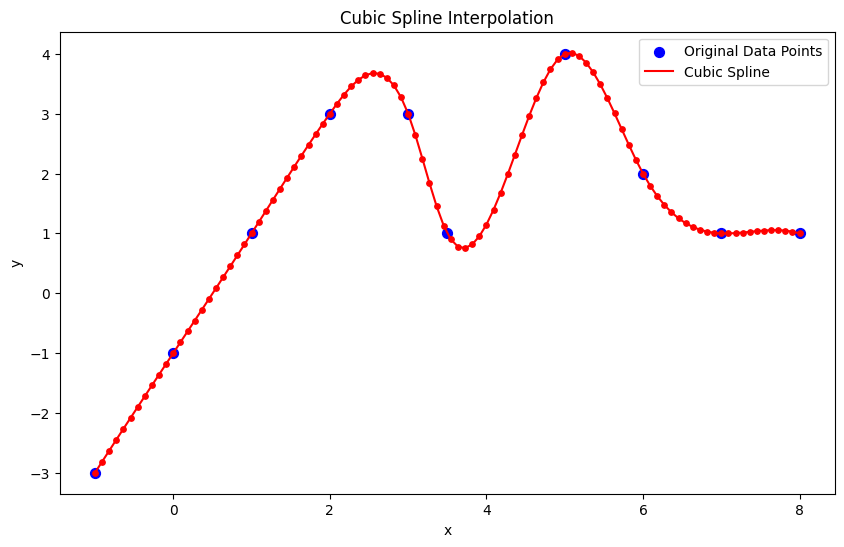

In [444]:
cs = CubicSpline(x, y)
y_new_cs= cs(x_new)

plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50, label='Original Data Points')
plt.scatter(x_new, y_new_cs , s=15, color='red')
plt.plot(x_new, y_new_cs, label='Cubic Spline',color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.legend()

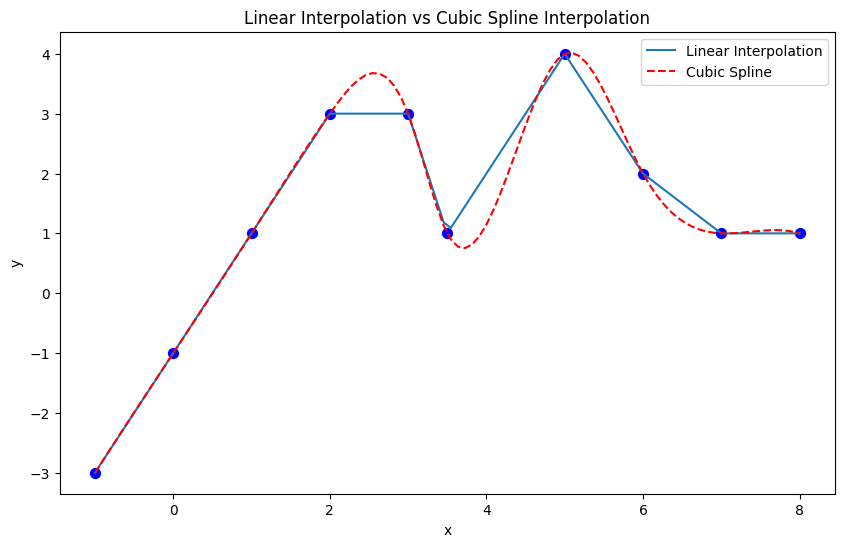

In [445]:
plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50)
plt.plot(x_new, y_new, label='Linear Interpolation')
plt.plot(x_new, y_new_cs, "r--", label='Cubic Spline')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Interpolation vs Cubic Spline Interpolation')
plt.legend()


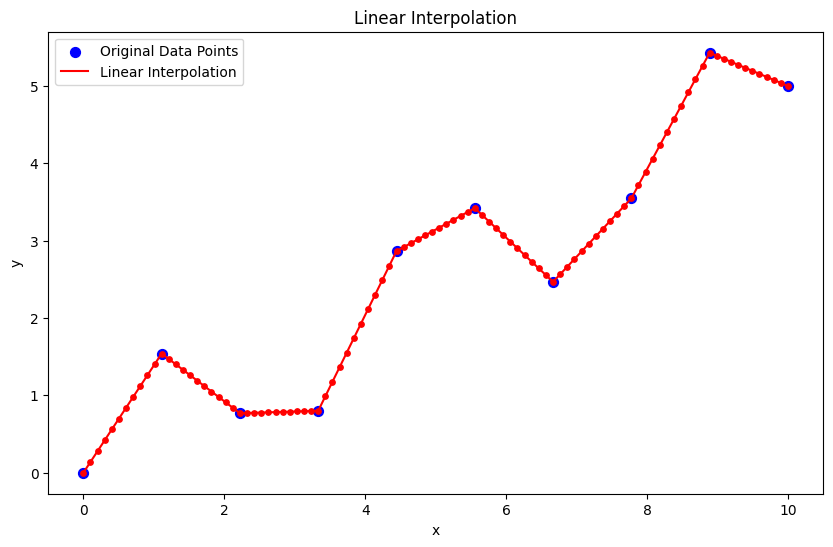

In [446]:
def func(x):
    y = np.sin((np.pi/2)* x ) + x/2
    return y

x = np.linspace(0,10,10)
y = func(x)
g = interpolating_function(x,y)
x_new = np.linspace(0,10,100)
y_new = [g(xi) for xi in x_new]


plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50, label='Original Data Points')
plt.scatter(x_new, y_new , s=15, color='red')
plt.plot(x_new, y_new, label='Linear Interpolation', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Interpolation')
plt.legend()

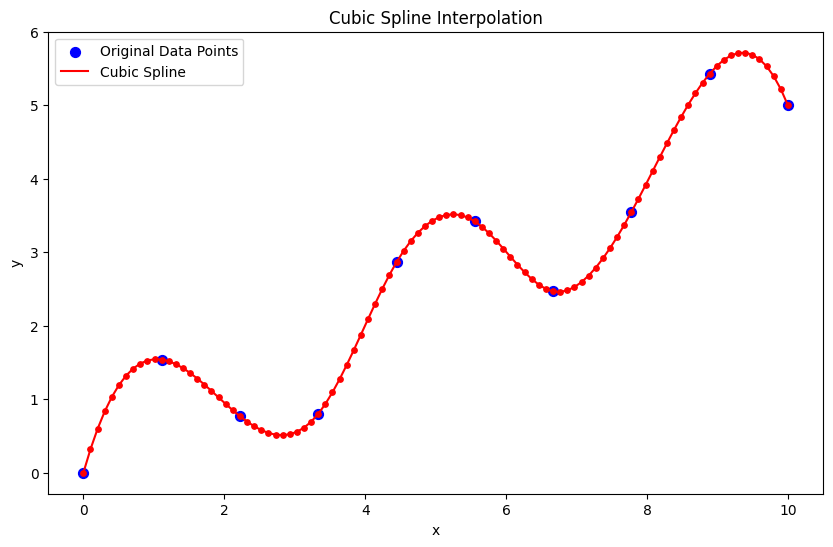

In [447]:
cs = CubicSpline(x, y)
y_new_cs= cs(x_new)

plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50, label='Original Data Points')
plt.scatter(x_new, y_new_cs , s=15, color='red')
plt.plot(x_new, y_new_cs, label='Cubic Spline',color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.legend()

/var/folders/z0/1782mm6s5f3_d0q0lnpt5vk40000gn/T/ipykernel_27506/2336198325.py:6: RuntimeWarning: invalid value encountered in divide
  no_err = ((y-y)/y)
/var/folders/z0/1782mm6s5f3_d0q0lnpt5vk40000gn/T/ipykernel_27506/2336198325.py:7: RuntimeWarning: invalid value encountered in divide
  rel_err = ((y - y_new) / y)
/var/folders/z0/1782mm6s5f3_d0q0lnpt5vk40000gn/T/ipykernel_27506/2336198325.py:8: RuntimeWarning: invalid value encountered in divide
  rel_err_cs = ((y - y_new_cs) / y)


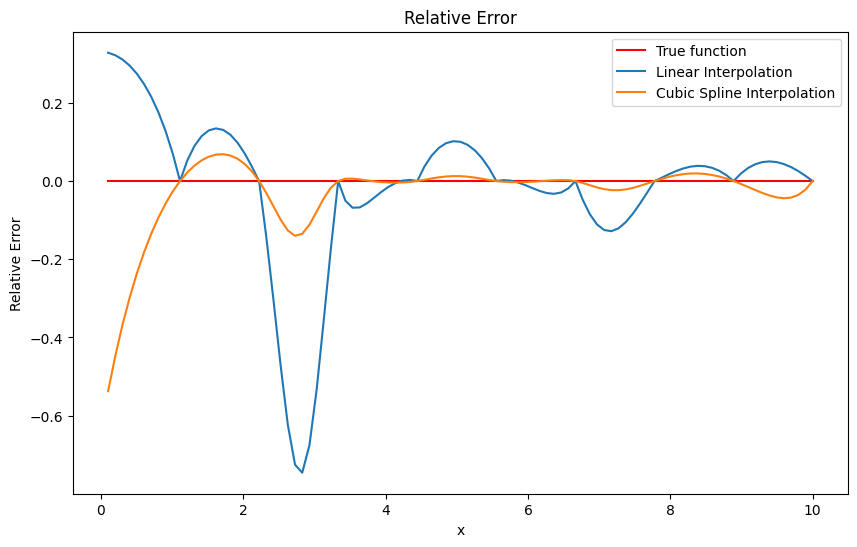

In [462]:
#RELATIVE ERROR

x=np.linspace(0,10,100)
y=func(x)

no_err = ((y-y)/y)
rel_err = ((y - y_new) / y)
rel_err_cs = ((y - y_new_cs) / y)

plt.figure(figsize=(10,6))
plt.title('Relative Error')
plt.plot(x,no_err, color='red',label="True function")
plt.plot(x,rel_err,label='Linear Interpolation')
plt.plot(x,rel_err_cs,label='Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('Relative Error')
plt.legend()


In [449]:
 #Simple Harmonic Motion :

 def func_x(t, A=1, omega=1):
    x = A*np.cos(omega*t)
    return x

def func_v(t, A=1, omega=1):
    v = A*omega*np.sin(omega*t)
    return v


In [450]:
t=np.linspace(0,10,10)
x=func_x(t)
v=func_v(t)

t_new = np.linspace(0,10,1000) #new time grid for interpolation

x_true = func_x(t_new)
v_true = func_v(t_new)

E_true = 0.5*x_true**2 + 0.5*v_true**2

print("True mean energy: ", np.mean(E_true), "Energy std dev: ", np.std(E_true))


True mean energy:  0.5 Energy std dev:  3.435418271361579e-17


In [451]:
# Linear Interpolation

g=interpolating_function(t,x)
x_new = [g(xi) for xi in t_new]

h=interpolating_function(t,v)
v_new = [h(xi) for xi in t_new]

# Calculating Energy

x_new = np.array(x_new)
v_new = np.array(v_new)

E_new = 0.5*x_new**2 + 0.5*v_new**2

print("Linear Interpolation")
print("Mean energy: ", np.mean(E_new), "Energy std dev: ", np.std(E_new))


Linear Interpolation
Mean energy:  0.40737791064015483 Energy std dev:  0.04156618928686281


In [452]:
# Cubic Spline Interpolation

cs = CubicSpline(t, x)
x_new_cs = cs(t_new)

cs = CubicSpline(t, v)
v_new_cs= cs(t_new)

E_new_cs = 0.5*x_new_cs**2 + 0.5*v_new_cs**2

print("Cubic Spline Interpolation")
print("Mean energy: ", np.mean(E_new_cs), "Energy std dev: ", np.std(E_new_cs))


Cubic Spline Interpolation
Mean energy:  0.5009751331819261 Energy std dev:  0.012098465294867793


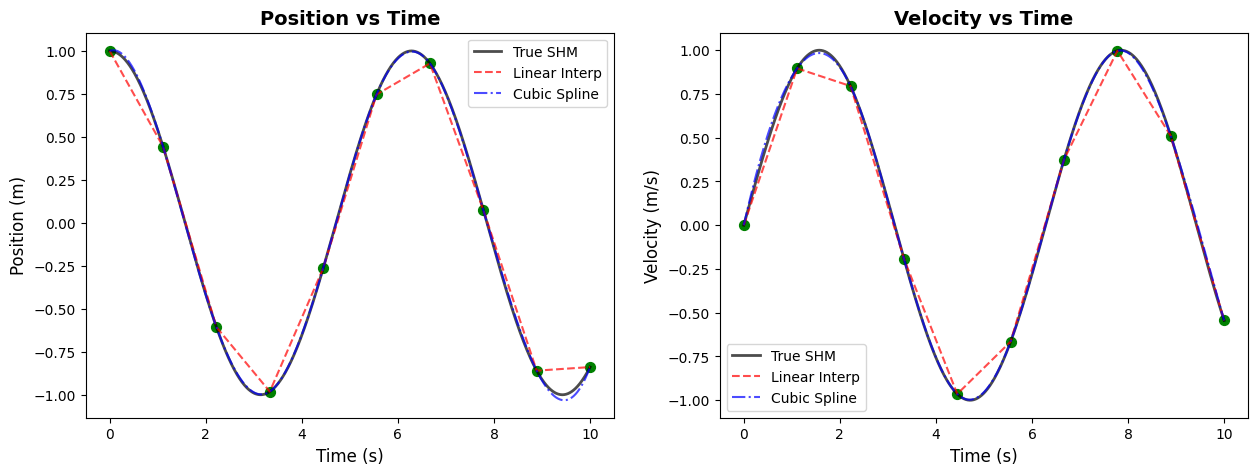

In [453]:
# Position vs Time and Velocity vs Time

fig,axes = plt.subplots(1,2,figsize=(15,5))

axes[0].plot(t_new, x_true, 'k-', linewidth=2, label='True SHM',alpha=0.7)
axes[0].plot(t_new, x_new, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[0].plot(t_new, x_new_cs, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[0].scatter(t,x, s=50, c='green')
axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Position (m)', fontsize=12)
axes[0].set_title('Position vs Time', fontsize=14, fontweight='bold')
axes[0].legend()

axes[1].plot(t_new, v_true, 'k-', linewidth=2, label='True SHM',alpha=0.7)
axes[1].plot(t_new, v_new, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[1].plot(t_new, v_new_cs, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[1].scatter(t,v, s=50, c='green')
axes[1].set_xlabel('Time (s)', fontsize=12)
axes[1].set_ylabel('Velocity (m/s)', fontsize=12)
axes[1].set_title('Velocity vs Time', fontsize=14, fontweight='bold')
axes[1].legend()

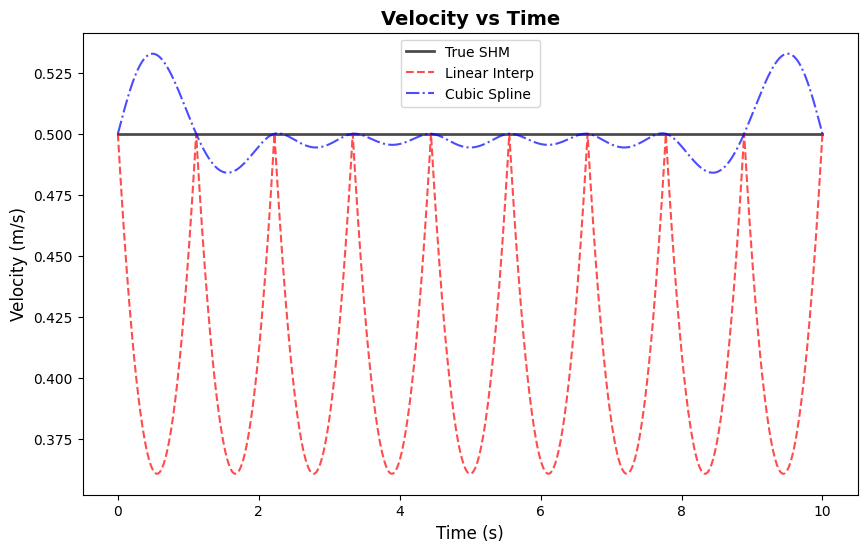

In [454]:
# Energy vs Time    


plt.figure(figsize=(10,6))
plt.plot(t_new, E_true, 'k-', linewidth=2, label='True SHM',alpha=0.7)
plt.plot(t_new, E_new, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
plt.plot(t_new, E_new_cs, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Energyy (m/s)', fontsize=12)
plt.title(Energy vs Time', fontsize=14, fontweight='bold')
plt.legend()

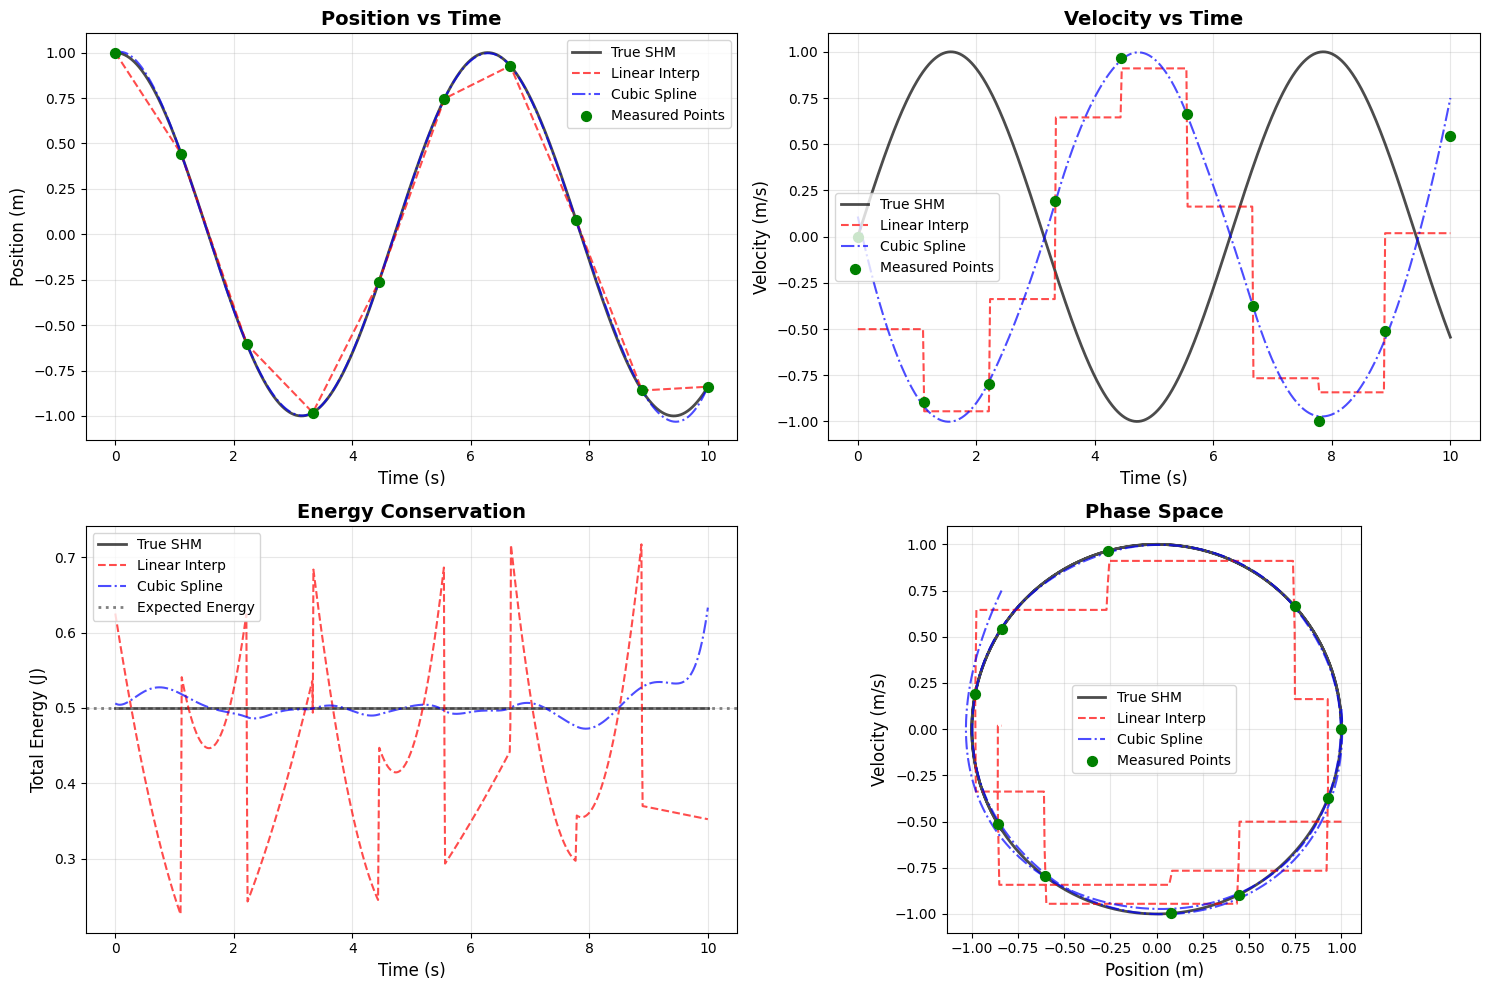

In [455]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Position comparison
axes[0, 0].plot(t_dense, x_true, 'k-', linewidth=2, label='True SHM', alpha=0.7)
axes[0, 0].plot(t_dense, x_linear, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[0, 0].plot(t_dense, x_spline, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[0, 0].scatter(t_measured, x_measured, s=50, c='green', 
                   marker='o', zorder=5, label='Measured Points')
axes[0, 0].set_xlabel('Time (s)', fontsize=12)
axes[0, 0].set_ylabel('Position (m)', fontsize=12)
axes[0, 0].set_title('Position vs Time', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Velocity comparison
axes[0, 1].plot(t_dense, v_true, 'k-', linewidth=2, label='True SHM', alpha=0.7)
axes[0, 1].plot(t_dense, v_linear, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[0, 1].plot(t_dense, v_spline, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[0, 1].scatter(t_measured, v_measured, s=50, c='green', 
                   marker='o', zorder=5, label='Measured Points')
axes[0, 1].set_xlabel('Time (s)', fontsize=12)
axes[0, 1].set_ylabel('Velocity (m/s)', fontsize=12)
axes[0, 1].set_title('Velocity vs Time', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Energy conservation
axes[1, 0].plot(t_dense, E_true, 'k-', linewidth=2, label='True SHM', alpha=0.7)
axes[1, 0].plot(t_dense, E_linear, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[1, 0].plot(t_dense, E_spline, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[1, 0].axhline(y=0.5*k*A**2, color='gray', linestyle=':', 
                   linewidth=2, label='Expected Energy')
axes[1, 0].set_xlabel('Time (s)', fontsize=12)
axes[1, 0].set_ylabel('Total Energy (J)', fontsize=12)
axes[1, 0].set_title('Energy Conservation', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Phase space (x vs v)
axes[1, 1].plot(x_true, v_true, 'k-', linewidth=2, label='True SHM', alpha=0.7)
axes[1, 1].plot(x_linear, v_linear, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[1, 1].plot(x_spline, v_spline, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[1, 1].scatter(x_measured, v_measured, s=50, c='green', 
                   marker='o', zorder=5, label='Measured Points')
axes[1, 1].set_xlabel('Position (m)', fontsize=12)
axes[1, 1].set_ylabel('Velocity (m/s)', fontsize=12)
axes[1, 1].set_title('Phase Space', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_aspect('equal')

plt.tight_layout()
plt.show()

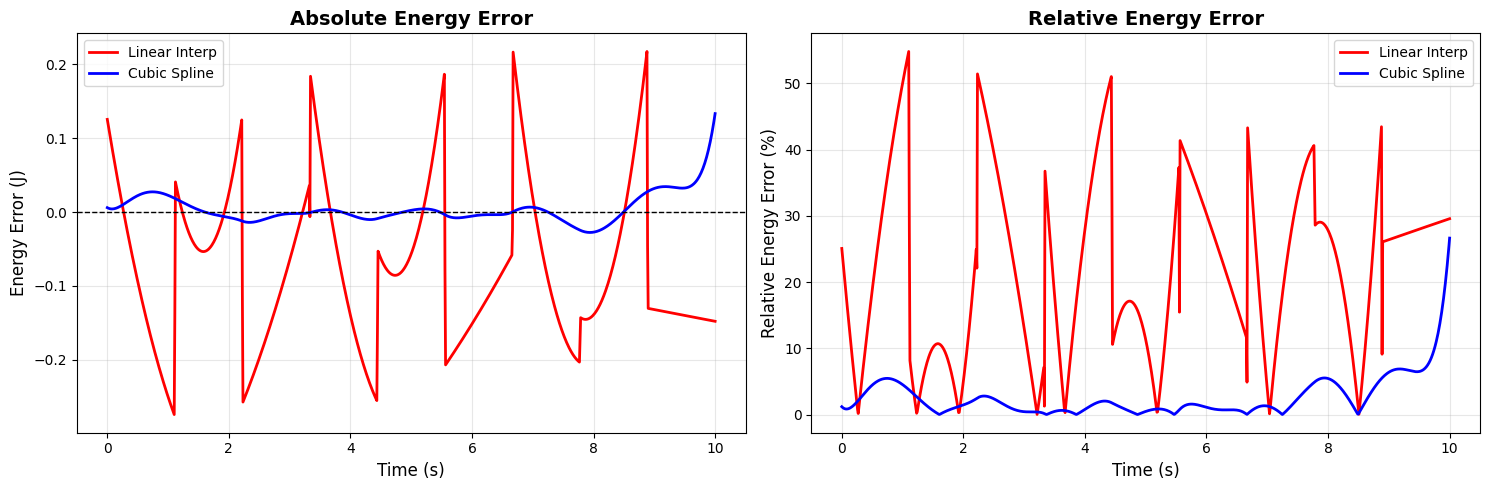


Maximum relative energy errors:
Linear interpolation: 54.80%
Cubic spline: 26.63%


In [456]:
# Calculate relative energy errors
rel_error_linear = np.abs((E_linear - E_true[0]) / E_true[0]) * 100
rel_error_spline = np.abs((E_spline - E_true[0]) / E_true[0]) * 100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Absolute energy error
axes[0].plot(t_dense, E_linear - E_true[0], 'r-', linewidth=2, label='Linear Interp')
axes[0].plot(t_dense, E_spline - E_true[0], 'b-', linewidth=2, label='Cubic Spline')
axes[0].axhline(y=0, color='k', linestyle='--', linewidth=1)
axes[0].set_xlabel('Time (s)', fontsize=12)
axes[0].set_ylabel('Energy Error (J)', fontsize=12)
axes[0].set_title('Absolute Energy Error', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Relative energy error
axes[1].plot(t_dense, rel_error_linear, 'r-', linewidth=2, label='Linear Interp')
axes[1].plot(t_dense, rel_error_spline, 'b-', linewidth=2, label='Cubic Spline')
axes[1].set_xlabel('Time (s)', fontsize=12)
axes[1].set_ylabel('Relative Energy Error (%)', fontsize=12)
axes[1].set_title('Relative Energy Error', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nMaximum relative energy errors:")
print(f"Linear interpolation: {np.max(rel_error_linear):.2f}%")
print(f"Cubic spline: {np.max(rel_error_spline):.2f}%")

In [457]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def func_x(t, A=1, omega=1, phi=0):
    """True SHM position"""
    return A * np.cos(omega * t + phi)

def func_v(t, A=1, omega=1, phi=0):
    """True SHM velocity"""
    return -A * omega * np.sin(omega * t + phi)

# Set parameters
A = 1.0
omega = 1.0
m = 1.0  # mass
k = omega**2 * m  # spring constant

# Sparse measurements (10 points over ~1.5 periods)
t_measured = np.linspace(0, 10, 10)
x_measured = func_x(t_measured, A, omega)
v_measured = func_v(t_measured, A, omega)

# Dense time grid for interpolation
t_dense = np.linspace(0, 10, 1000)

# True values (for comparison)
x_true = func_x(t_dense, A, omega)
v_true = func_v(t_dense, A, omega)
E_true = 0.5 * m * v_true**2 + 0.5 * k * x_true**2

print(f"True energy: {E_true[0]:.6f} (should be constant)")
print(f"Energy variation in true solution: {np.std(E_true):.2e}")

True energy: 0.500000 (should be constant)
Energy variation in true solution: 3.44e-17


In [458]:
# LINEAR INTERPOLATION - interpolate position, then differentiate
from scipy.interpolate import interp1d

# Interpolate position
linear_interp = interp1d(t_measured, x_measured, kind='linear')
x_linear = linear_interp(t_dense)

# Calculate velocity as derivative (using finite differences)
v_linear = np.gradient(x_linear, t_dense)

# Calculate energy
E_linear = 0.5 * m * v_linear**2 + 0.5 * k * x_linear**2

print(f"\nLinear Interpolation:")
print(f"Mean energy: {np.mean(E_linear):.6f}")
print(f"Energy std dev: {np.std(E_linear):.6f}")
print(f"Energy range: [{np.min(E_linear):.6f}, {np.max(E_linear):.6f}]")
print(f"Relative energy variation: {np.std(E_linear)/np.mean(E_linear)*100:.2f}%")


Linear Interpolation:
Mean energy: 0.424699
Energy std dev: 0.103599
Energy range: [0.226007, 0.717204]
Relative energy variation: 24.39%


In [459]:
# CUBIC SPLINE - interpolate position, then differentiate
cs = CubicSpline(t_measured, x_measured)
x_spline = cs(t_dense)
v_spline = cs(t_dense, 1)  # First derivative

# Calculate energy
E_spline = 0.5 * m * v_spline**2 + 0.5 * k * x_spline**2

print(f"\nCubic Spline Interpolation:")
print(f"Mean energy: {np.mean(E_spline):.6f}")
print(f"Energy std dev: {np.std(E_spline):.6f}")
print(f"Energy range: [{np.min(E_spline):.6f}, {np.max(E_spline):.6f}]")
print(f"Relative energy variation: {np.std(E_spline)/np.mean(E_spline)*100:.2f}%")


Cubic Spline Interpolation:
Mean energy: 0.504399
Energy std dev: 0.020113
Energy range: [0.472373, 0.633168]
Relative energy variation: 3.99%


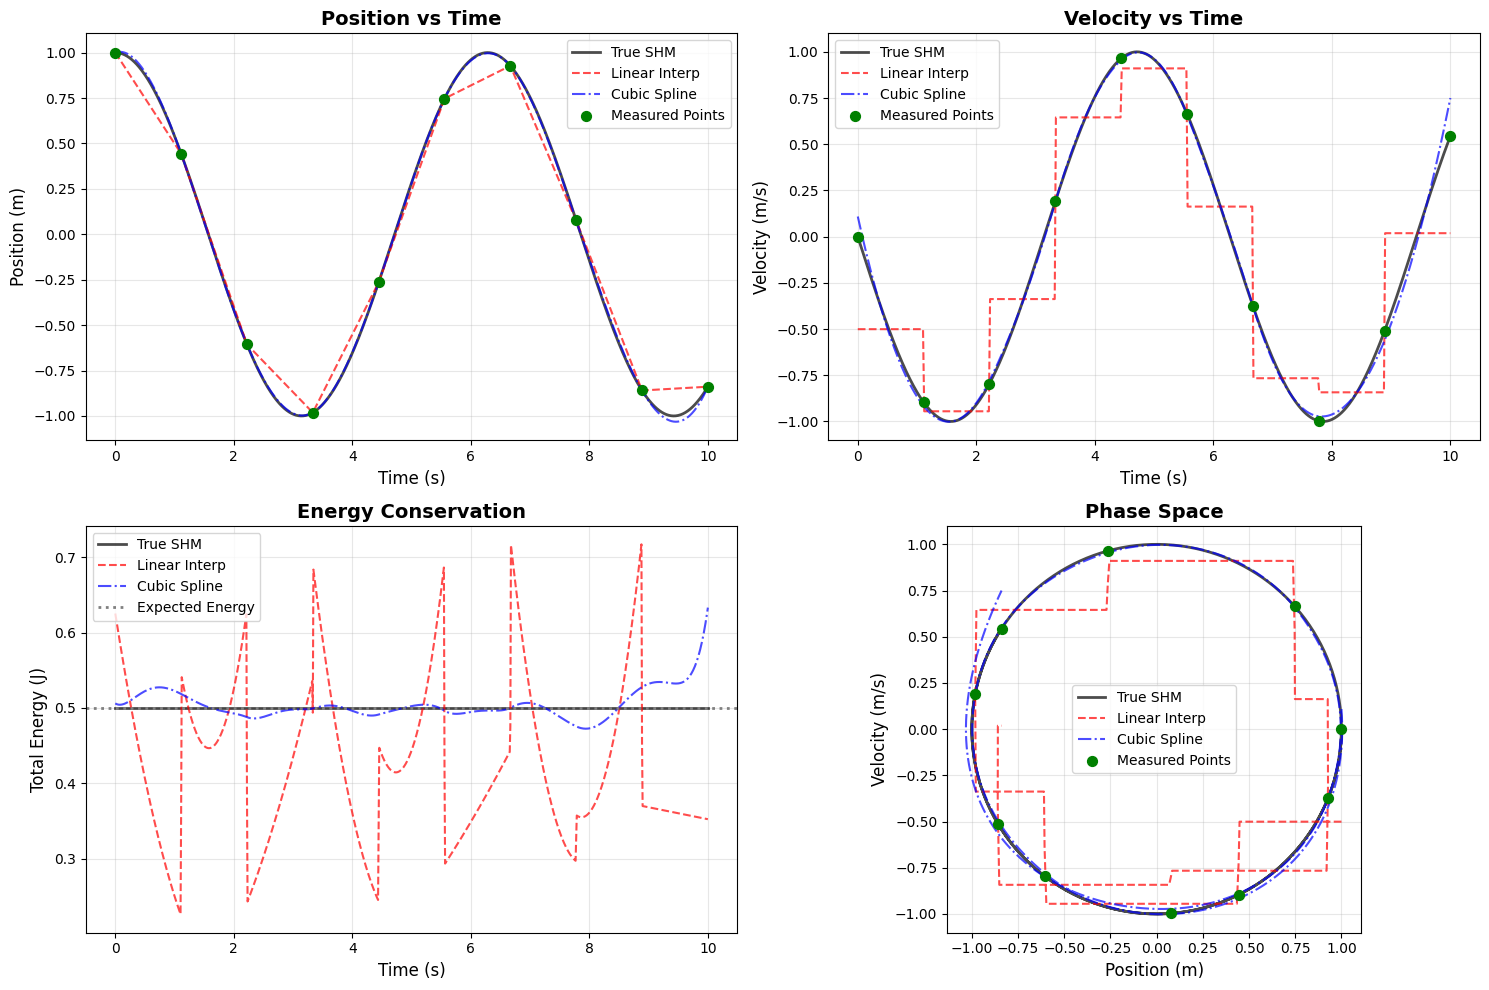

In [460]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Position comparison
axes[0, 0].plot(t_dense, x_true, 'k-', linewidth=2, label='True SHM', alpha=0.7)
axes[0, 0].plot(t_dense, x_linear, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[0, 0].plot(t_dense, x_spline, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[0, 0].scatter(t_measured, x_measured, s=50, c='green', 
                   marker='o', zorder=5, label='Measured Points')
axes[0, 0].set_xlabel('Time (s)', fontsize=12)
axes[0, 0].set_ylabel('Position (m)', fontsize=12)
axes[0, 0].set_title('Position vs Time', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Velocity comparison
axes[0, 1].plot(t_dense, v_true, 'k-', linewidth=2, label='True SHM', alpha=0.7)
axes[0, 1].plot(t_dense, v_linear, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[0, 1].plot(t_dense, v_spline, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[0, 1].scatter(t_measured, v_measured, s=50, c='green', 
                   marker='o', zorder=5, label='Measured Points')
axes[0, 1].set_xlabel('Time (s)', fontsize=12)
axes[0, 1].set_ylabel('Velocity (m/s)', fontsize=12)
axes[0, 1].set_title('Velocity vs Time', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Energy conservation
axes[1, 0].plot(t_dense, E_true, 'k-', linewidth=2, label='True SHM', alpha=0.7)
axes[1, 0].plot(t_dense, E_linear, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[1, 0].plot(t_dense, E_spline, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[1, 0].axhline(y=0.5*k*A**2, color='gray', linestyle=':', 
                   linewidth=2, label='Expected Energy')
axes[1, 0].set_xlabel('Time (s)', fontsize=12)
axes[1, 0].set_ylabel('Total Energy (J)', fontsize=12)
axes[1, 0].set_title('Energy Conservation', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Phase space (x vs v)
axes[1, 1].plot(x_true, v_true, 'k-', linewidth=2, label='True SHM', alpha=0.7)
axes[1, 1].plot(x_linear, v_linear, 'r--', linewidth=1.5, label='Linear Interp', alpha=0.7)
axes[1, 1].plot(x_spline, v_spline, 'b-.', linewidth=1.5, label='Cubic Spline', alpha=0.7)
axes[1, 1].scatter(x_measured, v_measured, s=50, c='green', 
                   marker='o', zorder=5, label='Measured Points')
axes[1, 1].set_xlabel('Position (m)', fontsize=12)
axes[1, 1].set_ylabel('Velocity (m/s)', fontsize=12)
axes[1, 1].set_title('Phase Space', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_aspect('equal')

plt.tight_layout()
plt.show()

In [464]:

import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter


def linear_interpolate(x_data, y_data, x_query, extrapolation='constant'):
    """
    Perform linear interpolation on data points.

    Given a set of data points (x_data, y_data), this function calculates
    the interpolated y-values at specified x-positions (x_query) using
    piecewise linear interpolation.

    Parameters:
    -----------
    x_data : list or tuple
        x-coordinates of input data points
    y_data : list or tuple
        y-coordinates of input data points
    x_query : float or list
        x value(s) where interpolation is desired
    extrapolation : str, optional
        How to handle points outside the data range:
        - 'forbid': raise error if outside domain
        - 'constant': use endpoint value
        - 'linear': continue with same slope

    Returns:
    --------
    float or list: Interpolated y value(s)

    Method:
    -------
    For each query point x:
      1. Find the two data points that bracket x
      2. Calculate the slope between these points
      3. Use the linear equation: y = y₀ + slope × (x - x₀)
    """

    # Convert to lists for processing
    x_data = list(x_data)
    y_data = list(y_data)

    # Check if data is sorted, sort if needed
    is_sorted = True
    for i in range(len(x_data) - 1):
        if x_data[i] > x_data[i + 1]:
            is_sorted = False
            break

    if not is_sorted:
        # Sort both lists together based on x values
        pairs = list(zip(x_data, y_data))
        pairs.sort(key=lambda pair: pair[0])
        x_data = [pair[0] for pair in pairs]
        y_data = [pair[1] for pair in pairs]

    # Handle both scalar and list inputs
    if isinstance(x_query, (int, float)):
        scalar_input = True
        x_query = [x_query]
    else:
        scalar_input = False
        x_query = list(x_query)

    # Initialize results
    y_interp = []

    x_min = x_data[0]
    x_max = x_data[-1]

    # Process each query point
    for xq in x_query:
        # Check if outside domain
        if xq < x_min or xq > x_max:
            if extrapolation == 'forbid':
                raise ValueError(
                    f"x_query value {xq} is outside the domain "
                    f"[{x_min}, {x_max}]. Extrapolation is forbidden."
                )
            elif extrapolation == 'constant':
                # Use constant value from nearest endpoint
                if xq < x_min:
                    y_interp.append(y_data[0])
                else:
                    y_interp.append(y_data[-1])
            elif extrapolation == 'linear':
                # Linear extrapolation using slope from nearest segment
                if xq < x_min:
                    slope = (y_data[1] - y_data[0]) / (x_data[1] - x_data[0])
                    y = y_data[0] + slope * (xq - x_data[0])
                    y_interp.append(y)
                else:
                    slope = (y_data[-1] - y_data[-2]) / (x_data[-1] - x_data[-2])
                    y = y_data[-1] + slope * (xq - x_data[-1])
                    y_interp.append(y)
            else:
                raise ValueError(f"Unknown extrapolation method: '{extrapolation}'")
        else:
            # Find bracketing interval
            idx = None
            for i in range(len(x_data)):
                if x_data[i] >= xq:
                    idx = i
                    break

            # Handle exact match or boundary
            if idx is not None and x_data[idx] == xq:
                # Exact match with a data point
                y_interp.append(y_data[idx])
            elif idx == 0 or idx is None:
                # At or before first point
                y_interp.append(y_data[0])
            else:
                # Between two points: apply linear interpolation formula
                x0 = x_data[idx - 1]
                x1 = x_data[idx]
                y0 = y_data[idx - 1]
                y1 = y_data[idx]

                # Linear interpolation: y = y₀ + (y₁ - y₀) × (x - x₀) / (x₁ - x₀)
                slope = (y1 - y0) / (x1 - x0)
                y = y0 + slope * (xq - x0)
                y_interp.append(y)

    # Return scalar if input was scalar, list if input was list
    if scalar_input:
        return y_interp[0]
    else:
        return y_interp
def format_sci_notation(value, precision=2):
    """
    Convert scientific notation to superscript format,
    e.g. 1.23e-04 → '1.23 × 10⁻⁴'
    """
    sci_str = f"{value:.{precision}e}"
    if 'e' in sci_str:
        coeff, exp = sci_str.split('e')
        exp_int = int(exp)

        superscript_map = {
            '0': '⁰', '1': '¹', '2': '²', '3': '³', '4': '⁴',
            '5': '⁵', '6': '⁶', '7': '⁷', '8': '⁸', '9': '⁹',
            '-': '⁻', '+': '⁺'
        }
        exp_super = ''.join(superscript_map.get(c, c) for c in str(exp_int))
        return f"{coeff} × 10{exp_super}"
    else:
        return sci_str
# ======================================================================
# MAIN: Harmonic oscillator energy with linear vs periodic cubic spline
# ======================================================================

def main():
    print("=" * 70)
    print("SIMPLE HARMONIC OSCILLATOR: ENERGY WITH LINEAR VS PERIODIC CUBIC SPLINE")
    print("=" * 70)

    # Parameters
    m = 1.0          # mass
    k = 1.0          # spring constant
    omega = np.sqrt(k/m)
    T = 2 * np.pi / omega   # one complete period
    N = 2000        # number of sample points
    A = 1.0         # amplitude

    # Sample times and exact SHM solution: x(t) = A cos(omega t)
    t_samples = np.linspace(0, T, N)
    x_samples = A * np.cos(omega * t_samples)
    v_samples = -A * omega * np.sin(omega * t_samples)

    # Fine time grid for evaluation
    t_fine = np.linspace(0, T, 5001)

    # Exact solution on fine grid
    x_true = A * np.cos(omega * t_fine)
    v_true = -A * omega * np.sin(omega * t_fine)
    E_true = 0.5 * m * v_true**2 + 0.5 * k * x_true**2

    # ============== LINEAR INTERPOLATION (CUSTOM FUNCTION) ==============
    print("\nPerforming linear interpolation using custom function...")
    print(f"Number of sample points: {N}")
    x_lin = np.array(linear_interpolate(t_samples, x_samples, list(t_fine)))
    v_lin = np.gradient(x_lin, t_fine)
    E_lin = 0.5 * m * v_lin**2 + 0.5 * k * x_lin**2
    KE_lin = 0.5 * m * v_lin**2
    PE_lin = 0.5 * k * x_lin**2

    # ============== CUBIC SPLINE INTERPOLATION (PERIODIC) ==============
    print("Performing cubic spline interpolation with bc_type='periodic'...")
    cs = CubicSpline(t_samples, x_samples, bc_type='periodic')
    x_cub = cs(t_fine)
    v_cub = cs(t_fine, 1)
    E_cub = 0.5 * m * v_cub**2 + 0.5 * k * x_cub**2
    KE_cub = 0.5 * m * v_cub**2
    PE_cub = 0.5 * k * x_cub**2

    # ============== COMPUTE ENERGY STATISTICS ==============
    E_true_mean = np.mean(E_true)
    E_lin_mean = np.mean(E_lin)
    E_cub_mean = np.mean(E_cub)

    E_true_var = E_true.max() - E_true.min()
    E_lin_var = E_lin.max() - E_lin.min()
    E_cub_var = E_cub.max() - E_cub.min()

    E_true_std = np.std(E_true)
    E_lin_std = np.std(E_lin)
    E_cub_std = np.std(E_cub)

    print("\n" + "-" * 70)
    print(f"ENERGY STATISTICS (mass=1, spring const=1, period=1, sample points={N})")
    print("-" * 70)
    print(f"\n{'Method':<30} {'Mean':<15} {'Variation':<20} {'Std Dev':<15}")
    print("-" * 70)
    print(f"{'Exact solution':<30} {E_true_mean:<15.6f} {E_true_var:<20.3e} {E_true_std:<15.3e}")
    print(f"{'Linear interpolation':<30} {E_lin_mean:<15.6f} {E_lin_var:<20.3e} {E_lin_std:<15.3e}")
    print(f"{'Cubic spline (periodic)':<30} {E_cub_mean:<15.6f} {E_cub_var:<20.3e} {E_cub_std:<15.3e}")
    print("-" * 70)

    print("\nCONCLUSION:")
    print(f"  Linear interpolation ΔE = {format_sci_notation(E_lin_var)} J")
    print(f"  Periodic cubic spline ΔE = {format_sci_notation(E_cub_var)} J")
    if E_cub_var > 0:
        print(f"  Cubic spline is about {E_lin_var / E_cub_var:.1f}× better (smaller energy variation)")

    # =================== PLOTS ===================
    # Create a custom formatter to avoid scientific notation offset
    class PlainFormatter(ScalarFormatter):
        def _set_format(self):
            self.format = "%1.10f"

    plain_formatter = PlainFormatter(useOffset=False, useMathText=False)

    # 1) Linear interpolation analysis
    fig1, axes1 = plt.subplots(2, 2, figsize=(14, 10))
    fig1.suptitle(
        "LINEAR INTERPOLATION ANALYSIS - Energy Conservation Comparison",
        fontsize=14, fontweight="bold", y=1.00
    )

    sample_indices = np.linspace(0, N - 1, min(50, N), dtype=int)

    # 1a: Position
    ax1a = axes1[0, 0]
    ax1a.plot(t_fine, x_true, 'b-', linewidth=2.5, label='Exact', alpha=0.9)
    ax1a.plot(t_fine, x_lin, 'r--', linewidth=2, label='Linear interp', alpha=0.8)
    ax1a.scatter(t_samples[sample_indices], x_samples[sample_indices],
                 c='darkred', s=25, alpha=0.6, label='Sample points')
    ax1a.set_xlabel('Time (s)', fontweight='bold')
    ax1a.set_ylabel('Position x(t) (m)', fontweight='bold')
    ax1a.set_title('Position: Exact vs Linear', fontweight='bold')
    ax1a.legend()
    ax1a.grid(True, alpha=0.3, linestyle='--')

    # 1b: Velocity
    ax1b = axes1[0, 1]
    ax1b.plot(t_fine, v_true, 'b-', linewidth=2.5, label='Exact velocity')
    ax1b.plot(t_fine, v_lin, 'r--', linewidth=1.5, label='Linear velocity')
    ax1b.set_xlabel('Time (s)', fontweight='bold')
    ax1b.set_ylabel('Velocity v(t) (m/s)', fontweight='bold')
    ax1b.set_title('Velocity: Exact vs Linear', fontweight='bold')
    ax1b.legend()
    ax1b.grid(True, alpha=0.3, linestyle='--')

    # 1c: Energy (linear)
    ax1c = axes1[1, 0]
    ax1c.plot(t_fine, E_true, 'b-', linewidth=2.5, label='Exact energy', alpha=0.9)
    ax1c.plot(t_fine, E_lin, 'r-', linewidth=2, label='Linear energy', alpha=0.8)
    ax1c.axhline(E_true_mean, color='b', linestyle=':', alpha=0.5, label='Exact mean')
    ax1c.axhline(E_lin_mean, color='r', linestyle=':', alpha=0.5, label='Linear mean')
    ax1c.yaxis.set_major_formatter(plain_formatter)
    ax1c.set_xlabel('Time (s)', fontweight='bold')
    ax1c.set_ylabel('Energy (J)', fontweight='bold')
    ax1c.set_title(
        f"Energy (Linear): ΔE = {format_sci_notation(E_lin_var)} J",
        fontweight='bold'
    )
    ax1c.legend()
    ax1c.grid(True, alpha=0.3, linestyle='--')

    # 1d: Energy components (linear)
    ax1d = axes1[1, 1]
    ax1d.plot(t_fine, KE_lin, 'r--', linewidth=2, label='Kinetic Energy')
    ax1d.plot(t_fine, PE_lin, 'orange', linestyle='--', linewidth=2, label='Potential Energy')
    ax1d.plot(t_fine, E_lin, 'k-', linewidth=2.5, label='Total Energy')
    ax1d.yaxis.set_major_formatter(plain_formatter)
    ax1d.set_xlabel('Time (s)', fontweight='bold')
    ax1d.set_ylabel('Energy (J)', fontweight='bold')
    ax1d.set_title('Energy Components: Linear', fontweight='bold')
    ax1d.legend()
    ax1d.grid(True, alpha=0.3, linestyle='--')

    plt.tight_layout()
    plt.savefig('linear_spline_analysis_periodicCS.png', dpi=150, bbox_inches='tight')
    print("\n[Saved: linear_spline_analysis_periodicCS.png]")